In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5150,ham,Happy new year to u and ur family...may this n...,NaN,NaN,NaN
4059,spam,This weeks SavaMob member offers are now acces...,NaN,NaN,NaN
4174,ham,How are you doing. How's the queen. Are you go...,NaN,NaN,NaN
2879,spam,Last Chance! Claim ur å£150 worth of discount ...,NaN,NaN,NaN
1346,ham,Is it ok if I stay the night here? Xavier has ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.Data Cleaning
#2.EDA
#3.text preprocessing
#4.model building
#5.evaluation
#6.improvement
#7.website
#8.deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
686,ham,Every King Was Once A Crying Baby And Every Gr...
2651,ham,"Text me when you get off, don't call, my phone..."
4254,spam,Block Breaker now comes in deluxe format with ...
3076,ham,There is no sense in my foot and penis.
4633,ham,These won't do. Have to move on to morphine


In [9]:
#rename the cols
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
889,ham,Wife.how she knew the time of murder exactly
5118,ham,Are you driving or training?
4383,ham,Thanks honey but still haven't heard anything ...
2748,ham,Send his number and give reply tomorrow mornin...
2904,ham,Ha. You donÛ÷t know either. I did a a clever ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check duplicated data
df.duplicated().sum()

403

In [15]:
#remove duplicated
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

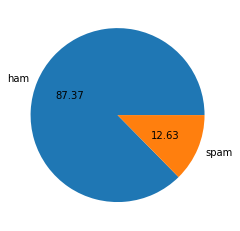

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imbalanced

In [22]:
# NLTK is a powerful tool for preprocessing text data for further analysis, such as converting text into numbers that can be easily worked with by machine learning models. NLTK also provides pre-trained models for part-of-speech (POS) tagging, which assigns grammatical tags to words in a sentence, such as nouns, verbs, and adjectives. 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

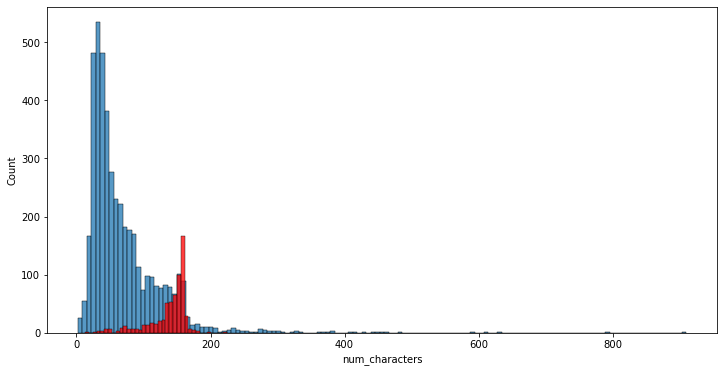

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

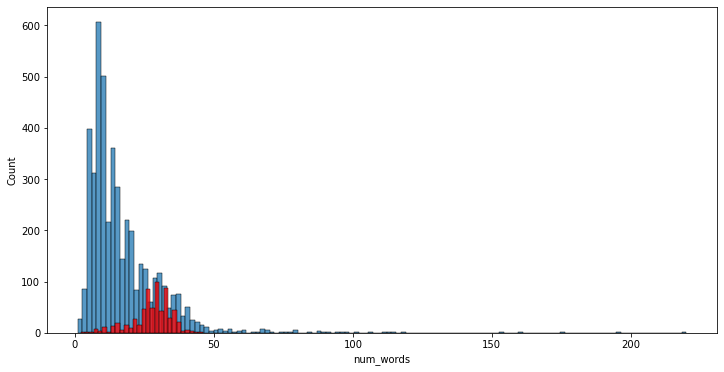

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

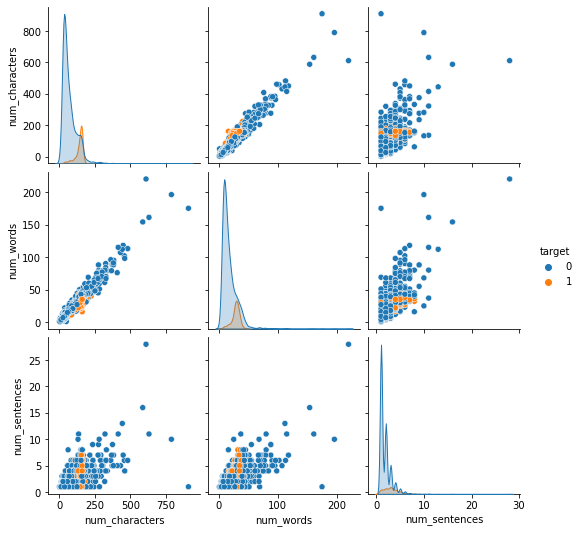

In [36]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

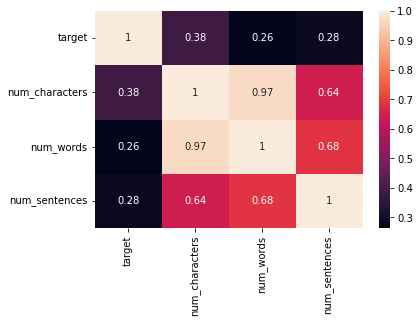

In [37]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [42]:
def transform_text(text):
    text = text.lower() #lower case
    text = nltk.word_tokenize(text) #tokenization
    
    #removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #removing stop words and punctuation
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [43]:
transform_text('hi how are you are you nim?')

'hi nim'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

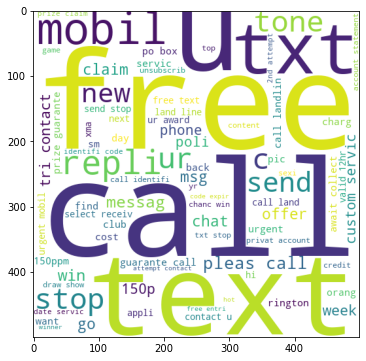

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

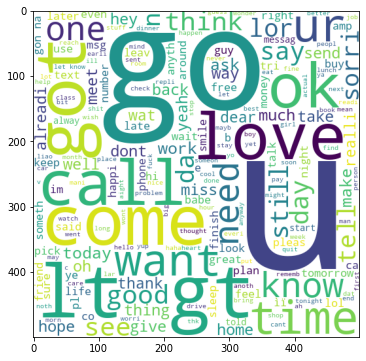

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [51]:
#top word freq
spam_corpus =[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [52]:
len(spam_corpus)

9939

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


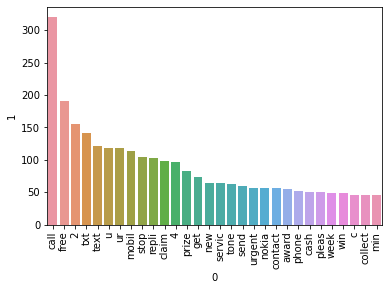

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35394

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


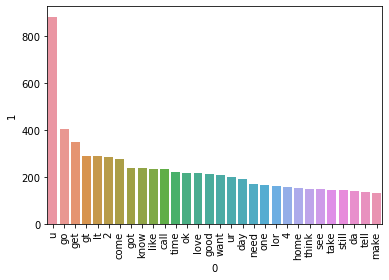

In [56]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [60]:
x.shape

(5169, 6708)

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test) 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [72]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [73]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [75]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [109]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [142]:
#appending the num_character col to x
x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [143]:
x.shape

(5169, 6710)

In [144]:
y = df['target'].values

In [145]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [150]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test) 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8858800773694391
[[793 103]
 [ 15 123]]
0.5442477876106194


In [151]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9429400386847195
[[884  12]
 [ 47  91]]
0.883495145631068


In [152]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [153]:
!pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 203, in wrapper
    return func(self, options, args)
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 315, in run
    requirement_set = resolver.resolve(
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 94, in resolve
    result = self._result = resolver.resolve(
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 472, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\Asus\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 341, in resolve
    self._add_to_criteria(self.state.criteria, r, parent=None)
  Fi

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [157]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [158]:
train_classifier(svc,x_train,y_train,x_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [159]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8704061895551257
Precision -  1.0
For  NB
Accuracy -  0.9429400386847195
Precision -  0.883495145631068
For  DT
Accuracy -  0.9506769825918762
Precision -  0.8849557522123894
For  LR
Accuracy -  0.965183752417795
Precision -  0.9473684210526315
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.925
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.9193548387096774
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


In [160]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [161]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.870406,1.000000
5,RF,0.970986,1.000000
8,ETC,0.978723,0.975410
4,LR,0.965184,0.947368
9,GBDT,0.952611,0.932039
6,AdaBoost,0.965184,0.925000
7,BgC,0.967118,0.919355
3,DT,0.950677,0.884956
2,NB,0.942940,0.883495
0,SVC,0.866538,0.000000


In [162]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [163]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.870406
1,RF,Accuracy,0.970986
2,ETC,Accuracy,0.978723
3,LR,Accuracy,0.965184
4,GBDT,Accuracy,0.952611
5,AdaBoost,Accuracy,0.965184
6,BgC,Accuracy,0.967118
7,DT,Accuracy,0.950677
8,NB,Accuracy,0.942940
9,SVC,Accuracy,0.866538


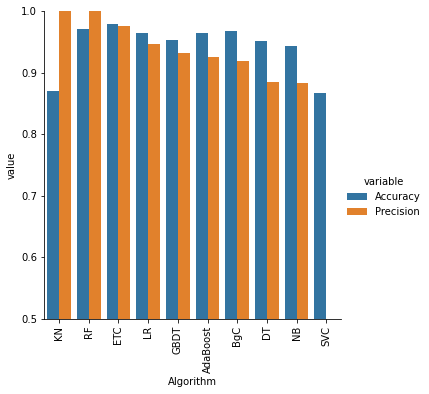

In [164]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [165]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [166]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [167]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [168]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [169]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [170]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [171]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.870406,1.000000,0.870406,1.000000,0.870406,1.000000,0.870406,1.000000
1,RF,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,LR,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368
4,GBDT,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039
5,AdaBoost,0.965184,0.925000,0.965184,0.925000,0.965184,0.925000,0.965184,0.925000
6,BgC,0.967118,0.919355,0.967118,0.919355,0.967118,0.919355,0.967118,0.919355
7,DT,0.950677,0.884956,0.950677,0.884956,0.950677,0.884956,0.950677,0.884956
8,NB,0.942940,0.883495,0.942940,0.883495,0.942940,0.883495,0.942940,0.883495
9,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000


In [172]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [173]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [176]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [177]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9516441005802708
Precision 1.0


In [178]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [179]:
from sklearn.ensemble import StackingClassifier

In [180]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [186]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 0.8928571428571429


In [187]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))